# Summary of Project: 

MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he 
deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 
(in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 
(in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to 
improve the selection of customers for the credit, the client wants some predictions that could help them in further 
investment and improvement in selection of customers.

So here we will build a model using classification technique which can be used to predict in terms of a probability for 
each loan transaction, whether the customer will be paying back the loaned amount within 5 days of issuance of loan. 
In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the 
loan has not been payed i.e. defaulter.  

Points to Remember:

• There are no null values in the dataset.

• There may be some customers with no loan history.

• The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.

• For some features, there may be values which might not be realistic. You may have to observe them and treat them with 
  a suitable explanation.
  
• You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that 
  data is expensive and we cannot lose more than 7-8% of the data.  



# 1-Importing basic libraries for Data Exploration

In [1]:
#Importing all basic required libray
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets import the micro credit data data and print them
micro_credit_data=pd.read_csv('Data file.csv')
print(micro_credit_data.shape)

print(micro_credit_data.head())

(209593, 37)
   Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1      

In [3]:
# Lets drop the first attribute which is not required for our analysis
micro_credit_data=micro_credit_data.drop(columns=['Unnamed: 0'])

In [4]:
#Lets print the data again
print(micro_credit_data.head())

   label       msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  21408I70789  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  76462I70374  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  17943I70372  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  55773I70781  241.0     21.228000     21.228000    159.42    159.42   
4      1  03813I82730  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0  

# 2-Exploratory Data Analysis (Exploring, Cleaning, Imputing & Visualizing)

In [5]:
#checking the information of the data and is there any null values present or not
micro_credit_data.info()

#so here we saw there are no missing data present in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [6]:
#lets check the number of duplicate datas present in the dataset or not
micro_credit_data.duplicated().sum()

1

In [7]:
#so there are 1 duplicate data present in the dataset, so lets drop them first
micro_credit_data= micro_credit_data.drop_duplicates()
micro_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209592 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209592 non-null  int64  
 1   msisdn                209592 non-null  object 
 2   aon                   209592 non-null  float64
 3   daily_decr30          209592 non-null  float64
 4   daily_decr90          209592 non-null  float64
 5   rental30              209592 non-null  float64
 6   rental90              209592 non-null  float64
 7   last_rech_date_ma     209592 non-null  float64
 8   last_rech_date_da     209592 non-null  float64
 9   last_rech_amt_ma      209592 non-null  int64  
 10  cnt_ma_rech30         209592 non-null  int64  
 11  fr_ma_rech30          209592 non-null  float64
 12  sumamnt_ma_rech30     209592 non-null  float64
 13  medianamnt_ma_rech30  209592 non-null  float64
 14  medianmarechprebal30  209592 non-null  float64
 15  

In [8]:
#lets see what are the types of data are present in each attribute
for columns in micro_credit_data:
    print("Column Name:",columns)
    print(np.unique(micro_credit_data[columns], return_counts=True))
    print(micro_credit_data[columns].value_counts())
    print("\n")

Column Name: label
(array([0, 1], dtype=int64), array([ 26162, 183430], dtype=int64))
1    183430
0     26162
Name: label, dtype: int64


Column Name: msisdn
(array(['00004I82738', '00005I96753', '00010I89237', ..., '99998I70781',
       '99998I95202', '99998I95206'], dtype=object), array([1, 1, 1, ..., 2, 1, 1], dtype=int64))
04581I85330    7
47819I90840    7
71742I90843    6
55809I89238    6
22038I88658    6
              ..
16920I95200    1
01850I90583    1
23527I70375    1
70237I82737    1
26552I85350    1
Name: msisdn, Length: 186243, dtype: int64


Column Name: aon
(array([-4.80000000e+01, -4.70000000e+01, -4.60000000e+01, ...,
        9.99391307e+05,  9.99520609e+05,  9.99860755e+05]), array([132,  84,  92, ...,   1,   1,   1], dtype=int64))
95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon,

In [9]:
# So here by looking the data, we saw that there some observations in the data set where the customers did not taken
# any loan within last 90 days, so we can drop those records as we are going to predict in terms of a probability for each 
# loan transaction, whether the customer will be paying back the loaned amount within 5 days of issuance of loan.

micro_credit_data.drop(micro_credit_data.loc[micro_credit_data['amnt_loans90']== 0].index, inplace=True)
print(micro_credit_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207549 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 207549 non-null  int64  
 1   msisdn                207549 non-null  object 
 2   aon                   207549 non-null  float64
 3   daily_decr30          207549 non-null  float64
 4   daily_decr90          207549 non-null  float64
 5   rental30              207549 non-null  float64
 6   rental90              207549 non-null  float64
 7   last_rech_date_ma     207549 non-null  float64
 8   last_rech_date_da     207549 non-null  float64
 9   last_rech_amt_ma      207549 non-null  int64  
 10  cnt_ma_rech30         207549 non-null  int64  
 11  fr_ma_rech30          207549 non-null  float64
 12  sumamnt_ma_rech30     207549 non-null  float64
 13  medianamnt_ma_rech30  207549 non-null  float64
 14  medianmarechprebal30  207549 non-null  float64
 15  

In [10]:
# Similarly here by looking the data, we saw that there some observations having negative data for 'aon' which is 
# age on cellular network in days, but pratically it can not be negative, either it may be  1st day, 2nd day and so on ...
# so lets drop those records.

micro_credit_data.drop(micro_credit_data.loc[micro_credit_data['aon'] < 1].index, inplace=True)
print(micro_credit_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206011 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 206011 non-null  int64  
 1   msisdn                206011 non-null  object 
 2   aon                   206011 non-null  float64
 3   daily_decr30          206011 non-null  float64
 4   daily_decr90          206011 non-null  float64
 5   rental30              206011 non-null  float64
 6   rental90              206011 non-null  float64
 7   last_rech_date_ma     206011 non-null  float64
 8   last_rech_date_da     206011 non-null  float64
 9   last_rech_amt_ma      206011 non-null  int64  
 10  cnt_ma_rech30         206011 non-null  int64  
 11  fr_ma_rech30          206011 non-null  float64
 12  sumamnt_ma_rech30     206011 non-null  float64
 13  medianamnt_ma_rech30  206011 non-null  float64
 14  medianmarechprebal30  206011 non-null  float64
 15  

In [11]:
# So for analysis lets remove the 'I' letter from mobile number of user field which is 'msisdn'

micro_credit_data.msisdn = micro_credit_data.msisdn.str.replace('I', '')
micro_credit_data['msisdn'] = micro_credit_data.msisdn.astype(float)
print(micro_credit_data.head())
#print(credit1.info())

   label        msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  2.140871e+09  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  7.646270e+09  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  1.794370e+09  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  5.577371e+09  241.0     21.228000     21.228000    159.42    159.42   
4      1  3.813827e+08  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0         

In [12]:
# Similarly for our analysis lets convert the 'pdate' field to Date format and the we will convert it to day of the year
# and created a new field called 'day_of _year' in the dataset.

micro_credit_data['pdate']= pd.to_datetime(micro_credit_data['pdate'])
micro_credit_data['day_of_year'] = micro_credit_data.pdate.dt.dayofyear
print(micro_credit_data.head())

   label        msisdn    aon  daily_decr30  daily_decr90  rental30  rental90  \
0      0  2.140871e+09  272.0   3055.050000   3065.150000    220.13    260.13   
1      1  7.646270e+09  712.0  12122.000000  12124.750000   3691.26   3691.26   
2      1  1.794370e+09  535.0   1398.000000   1398.000000    900.13    900.13   
3      1  5.577371e+09  241.0     21.228000     21.228000    159.42    159.42   
4      1  3.813827e+08  947.0    150.619333    150.619333   1098.90   1098.90   

   last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0                2.0                0.0              1539  ...   
1               20.0                0.0              5787  ...   
2                3.0                0.0              1539  ...   
3               41.0                0.0               947  ...   
4                4.0                0.0              2309  ...   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            1

In [13]:
# now again checking the information of the data
micro_credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206011 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   label                 206011 non-null  int64         
 1   msisdn                206011 non-null  float64       
 2   aon                   206011 non-null  float64       
 3   daily_decr30          206011 non-null  float64       
 4   daily_decr90          206011 non-null  float64       
 5   rental30              206011 non-null  float64       
 6   rental90              206011 non-null  float64       
 7   last_rech_date_ma     206011 non-null  float64       
 8   last_rech_date_da     206011 non-null  float64       
 9   last_rech_amt_ma      206011 non-null  int64         
 10  cnt_ma_rech30         206011 non-null  int64         
 11  fr_ma_rech30          206011 non-null  float64       
 12  sumamnt_ma_rech30     206011 non-null  float64       
 13 

In [14]:
# So here the data type of 'pcircle' is object, but we saw that all the values are belongs to one telecom circle 
# so we can drop this column and also as we have added 'day_of_year' field to our dataset, so we can drop pdate also.

mc_loan_data=micro_credit_data.drop(columns=['pcircle','pdate'])
print(mc_loan_data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 206011 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 206011 non-null  int64  
 1   msisdn                206011 non-null  float64
 2   aon                   206011 non-null  float64
 3   daily_decr30          206011 non-null  float64
 4   daily_decr90          206011 non-null  float64
 5   rental30              206011 non-null  float64
 6   rental90              206011 non-null  float64
 7   last_rech_date_ma     206011 non-null  float64
 8   last_rech_date_da     206011 non-null  float64
 9   last_rech_amt_ma      206011 non-null  int64  
 10  cnt_ma_rech30         206011 non-null  int64  
 11  fr_ma_rech30          206011 non-null  float64
 12  sumamnt_ma_rech30     206011 non-null  float64
 13  medianamnt_ma_rech30  206011 non-null  float64
 14  medianmarechprebal30  206011 non-null  float64
 15  

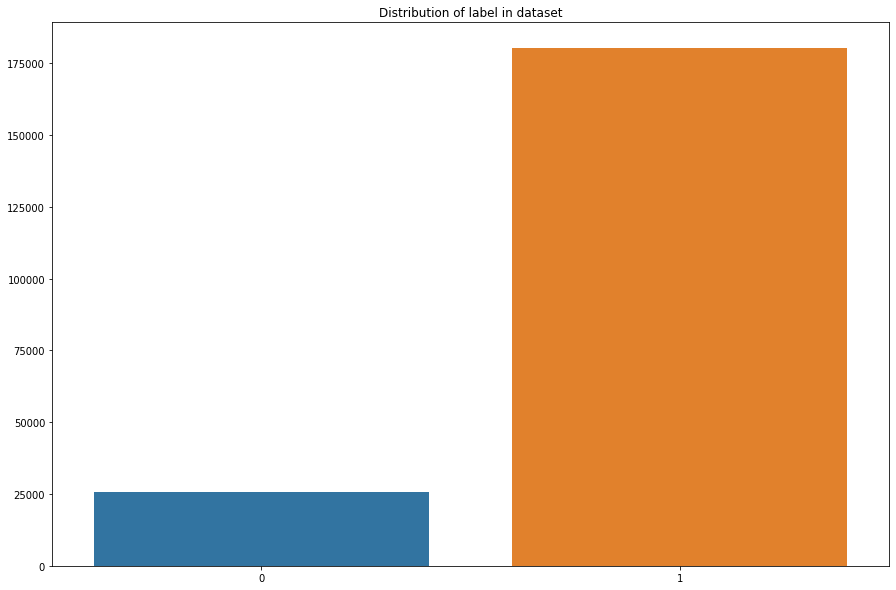

In [15]:
# now lets see the distribution of "label" in the dataset
plt.figure(figsize=(15,10))
plt.title('Distribution of label in dataset')
y = mc_loan_data["label"].value_counts()
sns.barplot(y.index, y.values)

# so by looking this bar plot, there is more label is True as compare to False.
# so the dataset is imbalanced. Label ‘1’ has approximately 85% records, while, label ‘0’ has approximately 15% records.
# so we will theat the datas using over sampling and under sampling technique, but before that we will build different
# model and then will go for this technoique.

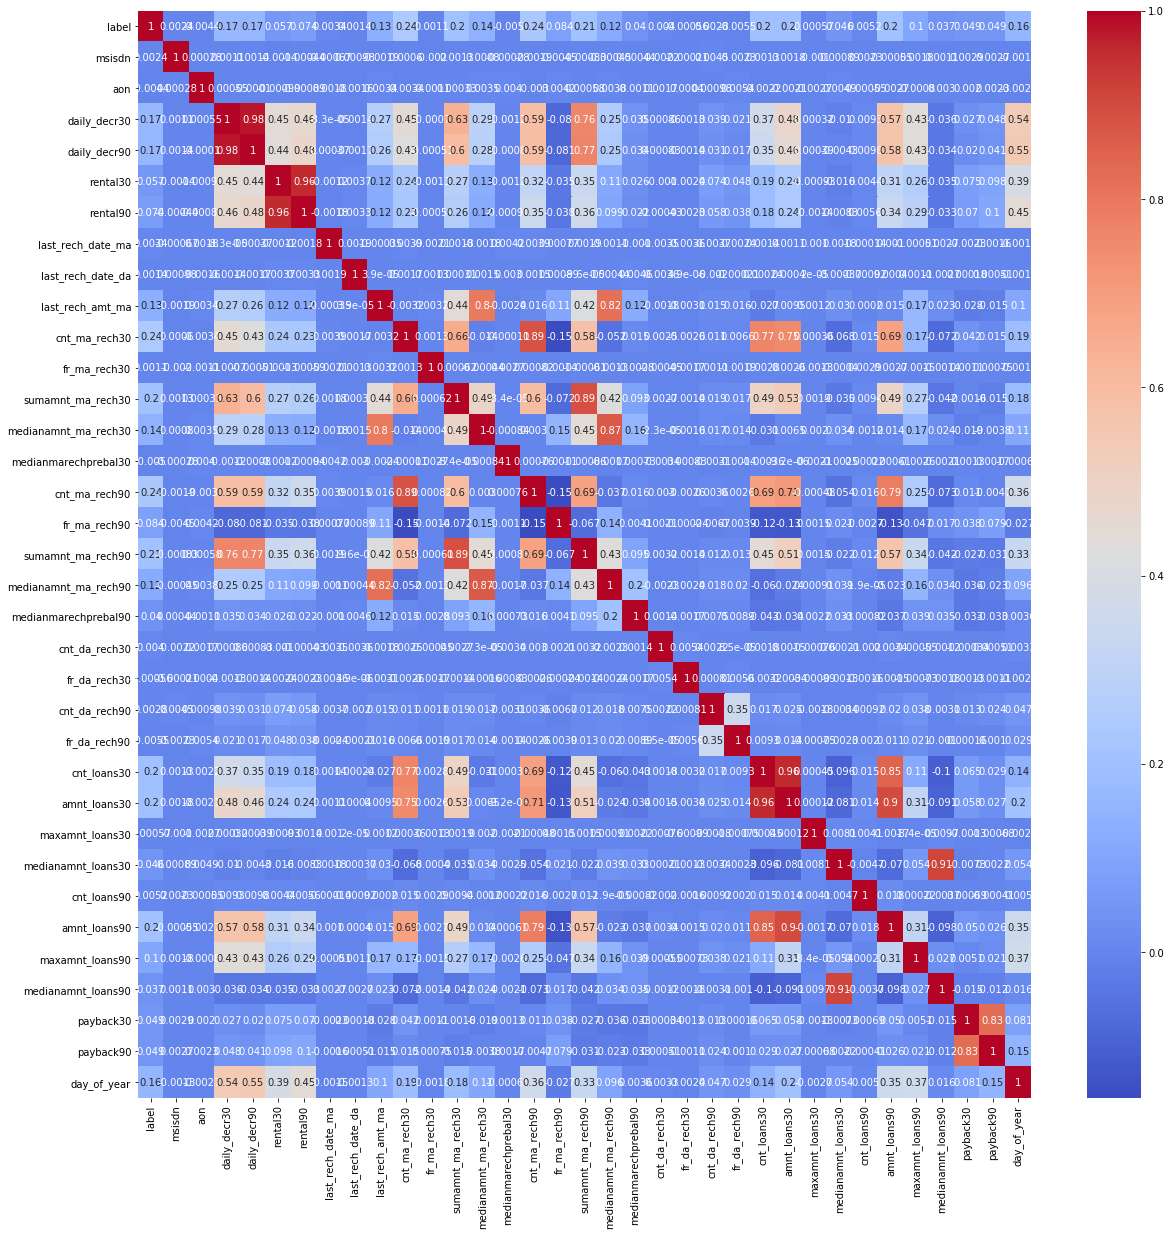

In [16]:
#lets see the corelation among data
plt.figure(figsize=(20,20))
sns.heatmap(mc_loan_data.corr(),cmap='coolwarm',annot=True)

#so here by looking the corelation between data, we can say that almost every attribute has palying some 
# role for predicting the label

# 3-Building Different Model and Finding the Best Model

In [17]:
#again checking the information of the data
print(mc_loan_data.info())
print(mc_loan_data.shape)
print(mc_loan_data.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206011 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 206011 non-null  int64  
 1   msisdn                206011 non-null  float64
 2   aon                   206011 non-null  float64
 3   daily_decr30          206011 non-null  float64
 4   daily_decr90          206011 non-null  float64
 5   rental30              206011 non-null  float64
 6   rental90              206011 non-null  float64
 7   last_rech_date_ma     206011 non-null  float64
 8   last_rech_date_da     206011 non-null  float64
 9   last_rech_amt_ma      206011 non-null  int64  
 10  cnt_ma_rech30         206011 non-null  int64  
 11  fr_ma_rech30          206011 non-null  float64
 12  sumamnt_ma_rech30     206011 non-null  float64
 13  medianamnt_ma_rech30  206011 non-null  float64
 14  medianmarechprebal30  206011 non-null  float64
 15  

In [18]:
#lets separating the input and output/target variables
dx=mc_loan_data.drop(columns=['label'])
y=mc_loan_data[['label']]

print(dx.shape)
print(y.shape)

(206011, 34)
(206011, 1)


In [19]:
# lets standardize the features by using StandardScaler

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(dx)

In [20]:
#dividing the train and test dataset
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(144207, 34) (61804, 34)
(144207, 1) (61804, 1)


In [21]:
#defining the models which will be used for model building
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
#from sklearn.svm import SVC
#sv=SVC()
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
#from sklearn.naive_bayes import GaussianNB
#gnb=GaussianNB()
#from sklearn.naive_bayes import MultinomialNB
#mnb=MultinomialNB()
#from sklearn.ensemble import RandomForestClassifier
#rf=RandomForestClassifier()
#from sklearn.ensemble import AdaBoostClassifier
#ad=AdaBoostClassifier()
#from sklearn.ensemble import GradientBoostingClassifier
#gd=GradientBoostingClassifier()

#did not executed other models, as it is taking more than 5-6 hours.

In [22]:
#appending all the models
models=[]
models.append(('LogisticRegression',lr))
#models.append(('SVC',sv))
models.append(('KNeighborsClassifier',knn))
models.append(('DecisionTreeClassifier',dtc))
#models.append(('GaussianNB',gnb))
#models.append(('MultinomialNB',mnb))
#models.append(('RandomForestClassifier',rf))
#models.append(('AdaBoostClassifier',ad))
#models.append(('GradientBoostingClassifier',gd))

In [23]:
#lets import all the classification outputs
from sklearn.datasets import make_multilabel_classification
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [28]:
#printing the output of each model
Model=[]
score=[]
cvs=[]
rocscore=[]
for name, model in models:
    print('************************',name,'**********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pred)
    print('Accuracy Score:',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model, x,y,cv=10,scoring='accuracy').mean()
    print('Cross Value Score:',sc)
    cvs.append(sc*100)
    print('\n')
    cr=classification_report(y_test,pred)
    print('Classification Report:\n',cr )
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('Confusion Matrix:\n',cm)
    print('\n')

************************ LogisticRegression **********************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.8755096757491424


Cross Value Score: 0.8766133851908012


Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.02      0.04      7770
           1       0.88      1.00      0.93     54034

    accuracy                           0.88     61804
   macro avg       0.76      0.51      0.49     61804
weighted avg       0.85      0.88      0.82     61804



Confusion Matrix:
 [[  174  7596]
 [   98 53936]]


************************ KNeighborsClassifier **********************


KNeighborsClassifier(algorithm='auto', leaf_size=3

In [29]:
#lets print the final result of all the models
result=pd.DataFrame({'Model':Model,'Accuracy_Score':score,'Cross_Value_Score':cvs})
print(result)

                    Model  Accuracy_Score  Cross_Value_Score
0      LogisticRegression       87.550968          87.661339
1    KNeighborsClassifier       88.034755          88.079278
2  DecisionTreeClassifier       88.207883          88.371495


In [24]:
# So here we saw DecisionTreeClassifier is the best model out of all the above model.
# We saw here the accuracy comes out to be around 88% for all the models, but the Label ‘0’ indicates 
# that the loan has not been payed i.e. defaulter class is very less and the precision is 0.53 and f1_score is 0.54. 
# It proves that the model is more biased towards majority class. So, it proves that this is not the best model.
# Now, we will apply different imbalanced data handling techniques and see their accuracy and recall results.

pip install -U imbalanced-learn
conda install -c conda-forge imbalanced-learn
pip install -U git+https://github.com/scikit-learn-contrib/imbalanced-learn.git


In [25]:
# Using SMOTE Algorithm: OverSampling method
# SMOTE Algorithm has oversampled the minority instances and made it equal to majority class. 
# Both categories have equal amount of records. More specifically, the minority class has been increased to the total 
# number of majority class.Now we will see the accuracy and recall results after applying SMOTE algorithm (Oversampling).

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)

print('Before OverSampling x_train:', x_train.shape)
print('Before OverSampling y_train:', y_train.shape)

print('After OverSampling x_train:', x_train_res.shape)
print('After OverSampling x_train:', y_train_res.shape)

Before OverSampling x_train: (144207, 34)
Before OverSampling y_train: (144207, 1)
After OverSampling x_train: (252614, 34)
After OverSampling x_train: (252614, 1)


Accuracy Score is: 0.8720147563264513
Cross Value Score: 0.8838848483565884
ROC_AUC Score: 0.7642702823699974
Confusion Matix:
 [[ 4820  2950]
 [ 4960 49074]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.62      0.55      7770
           1       0.94      0.91      0.93     54034

    accuracy                           0.87     61804
   macro avg       0.72      0.76      0.74     61804
weighted avg       0.89      0.87      0.88     61804

AxesSubplot(0.125,0.808774;0.62x0.0712264)


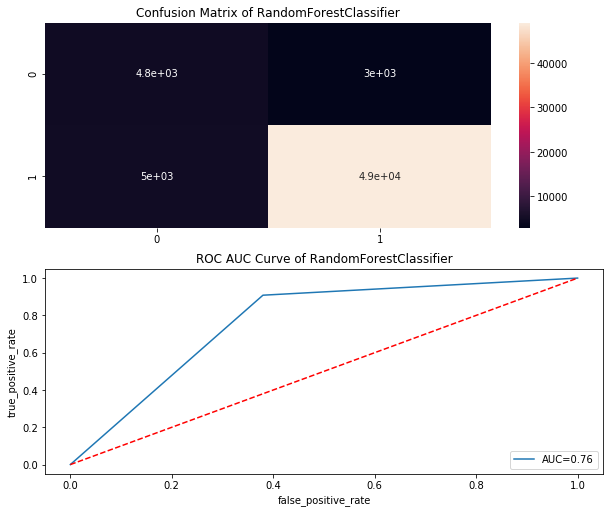

In [26]:
#lets build the model using x_train_res and y_train_res oversampling data.

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train_res,y_train_res)
pred_dtc=dtc.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_dtc))
print('Cross Value Score:', cross_val_score(dtc, x,y,cv=10,scoring='accuracy').mean())
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_dtc)
print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_dtc))
print('Classification Report:\n', classification_report(y_test,pred_dtc))

#lets print the confusion matrix
cm=confusion_matrix(y_test,pred_dtc)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix of DecisionTreeClassifier')
print(sns.heatmap(
cm,annot=True))
plt.subplot(912)

#lets print the roc auc curve
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title('ROC AUC Curve of DecisionTreeClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right') 


# Similarly here after implementation of oversampling techniques we saw here the accuracy comes out to be around 87% 
# for the model, but the Label ‘0’ indicates that the loan has not been payed i.e. defaulter class is very less and 
# the precision is 0.49 and f1_score is 0.55. 

In [27]:
# Using NearMiss Algorithm: Undersampling method

from imblearn.under_sampling import NearMiss 
nr = NearMiss()  
x_train_miss, y_train_miss = nr.fit_sample(x_train, y_train)

print('Before Undersampling x_train:', x_train.shape)
print('Before Undersampling y_train:', y_train.shape)

print('After Undersampling x_train:', x_train_miss.shape)
print('After Undersampling x_train:', y_train_miss.shape)

Before Undersampling x_train: (144207, 34)
Before Undersampling y_train: (144207, 1)
After Undersampling x_train: (35800, 34)
After Undersampling x_train: (35800, 1)


Accuracy Score is: 0.870590900265355
Cross Value Score: 0.8838654249905853
ROC_AUC Score: 0.7645028162591179
Confusion Matix:
 [[ 4839  2931]
 [ 5067 48967]]
Classification Report:
               precision    recall  f1-score   support

           0       0.49      0.62      0.55      7770
           1       0.94      0.91      0.92     54034

    accuracy                           0.87     61804
   macro avg       0.72      0.76      0.74     61804
weighted avg       0.89      0.87      0.88     61804

AxesSubplot(0.125,0.808774;0.62x0.0712264)


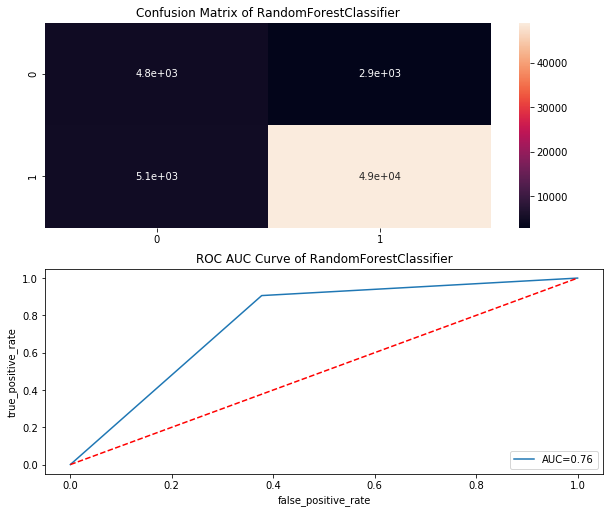

In [28]:
#lets build the model using x_train_miss and y_train_miss oversampling data.

from sklearn.tree import DecisionTreeClassifier
dtc_miss=DecisionTreeClassifier()
dtc_miss.fit(x_train_res,y_train_res)
pred_dtc_miss=dtc_miss.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_dtc_miss))
print('Cross Value Score:', cross_val_score(dtc_miss, x,y,cv=10,scoring='accuracy').mean())
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_dtc_miss)
print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_dtc_miss))
print('Classification Report:\n', classification_report(y_test,pred_dtc_miss))

#lets print the confusion matrix
cm=confusion_matrix(y_test,pred_dtc_miss)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix of DecisionTreeClassifier')
print(sns.heatmap(
cm,annot=True))
plt.subplot(912)

#lets print the roc auc curve
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title('ROC AUC Curve of DecisionTreeClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right') 

# Similarly here after implementation of undersampling techniques we saw here the accuracy comes out to be around 87% 
# for the model, but the Label ‘0’ indicates that the loan has not been payed i.e. defaulter class is very less and 
# the precision is 0.49 and f1_score is 0.55. 

# So we did not see much improvement on any of the above techniques i.e. using oversampling and undersampling, 
# hence we will go for our regular model and find the best parameter.

In [29]:
# So here DecisionTreeClassifier is the best model, so lets find out the best parameter for this to get maximum score
#lets use grid search method to find optimal value 

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
parameters = {'criterion':['gini','entropy'],'max_depth':[5,10,15,20]}
clf=GridSearchCV(dtc, parameters, cv=5)
clf.fit(x,y)
clf.best_params_

#as this is taking more time(more than 3 hrs) to find the best parameters, hence stopped the execution.

{'criterion': 'entropy', 'max_depth': 10}

Accuracy Score is: 0.9178046728367096
Cross Value Score: 0.918931516623644
ROC_AUC Score: 0.7538182379948675
Confusion Matix:
 [[ 4155  3615]
 [ 1465 52569]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.53      0.62      7770
           1       0.94      0.97      0.95     54034

    accuracy                           0.92     61804
   macro avg       0.84      0.75      0.79     61804
weighted avg       0.91      0.92      0.91     61804

AxesSubplot(0.125,0.808774;0.62x0.0712264)


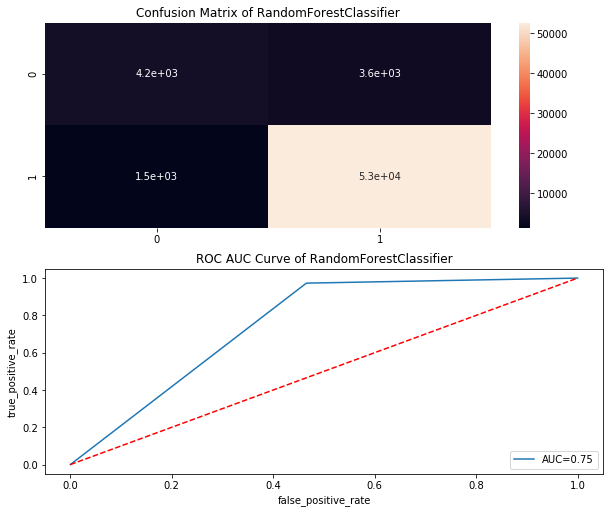

In [32]:
# So lets build the final model with 'criterion': 'entropy' and 'max_depth': 10 

from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=10)
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print('Accuracy Score is:', accuracy_score(y_test,pred_dtc))
print('Cross Value Score:', cross_val_score(dtc, x,y,cv=10,scoring='accuracy').mean())
false_positive_rate, true_positive_rate, threshold= roc_curve(y_test,pred_dtc)
print('ROC_AUC Score:',auc(false_positive_rate,true_positive_rate))
print('Confusion Matix:\n', confusion_matrix(y_test,pred_dtc))
print('Classification Report:\n', classification_report(y_test,pred_dtc))

#lets print the confusion matrix
cm=confusion_matrix(y_test,pred_dtc)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title('Confusion Matrix of DecisionTreeClassifier')
print(sns.heatmap(
cm,annot=True))
plt.subplot(912)

#lets print the roc auc curve
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.title('ROC AUC Curve of DecisionTreeClassifier')
plt.xlabel('false_positive_rate')
plt.ylabel('true_positive_rate')
plt.plot(false_positive_rate,true_positive_rate,label='AUC=%0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right') 


# Similarly here after implementation of oversampling techniques we saw here the accuracy comes out to be around 92% 
# for the model, but the Label ‘0’ indicates that the loan has not been payed i.e. defaulter class is very less and 
# the precision is 0.74 and f1_score is 0.62.  

In [33]:
#lets see the actual defaulter vs predicted defaulter
print('Actual defaulter:\n',y_test)
print('Predicted defaulter:\n',pred_dtc)

Actual defaulter:
         label
125812      1
51356       1
164435      1
139397      1
91215       1
...       ...
131975      1
108322      1
26665       1
184594      1
141897      0

[61804 rows x 1 columns]
Predicted defaulter:
 [1 1 1 ... 1 1 0]


In [40]:
#saving the final model using pickle

import pickle
filename ='pickledtcfile.pkl'
pickle.dump(dtc, open(filename, 'wb'))


In [41]:
#load the model from disk
dtc_defaulter_customer=pickle.load(open(filename, 'rb'))

In [42]:
#Use the loaded model to make predictions against test data
dtc_defaulter_customer.predict(x_test)

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

# Conclusion: 


So here 'DecisionTreeClassifier Model' is the best model out of all model tested above and by looking this we can conclude
that our model is predicting around 92% of correct results for Label ‘0’ indicates that the loan has not been payed 
i.e. defaulter.